In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
from warnings import filterwarnings
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate,cross_val_predict
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

rating       date         variation                                            reviews
0       5  31-Jul-18  Charcoal Fabric                                       Love my Echo!
1       5  31-Jul-18  Charcoal Fabric                                           Loved it!
2       4  31-Jul-18    Walnut Finish   Sometimes while playing a game, you can answer...
3       5  31-Jul-18  Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...
4       5  31-Jul-18  Charcoal Fabric                                               Music

In [3]:
df.describe()

rating
count 3149.00
mean     4.46
std      1.07
min      1.00
25%      4.00
50%      5.00
75%      5.00
max      5.00

In [4]:
df.groupby('rating').describe()

date                         variation                                           reviews                
       count unique        top  freq     count unique                           top freq   count unique top freq
rating                                                                                                          
1        161     43  30-Jul-18    60       161     13                         Black   30     161    130       15
2         96     21  30-Jul-18    43        96     14  Configuration: Fire TV Stick   15      96     78        4
3        152     26  30-Jul-18    73       152     14                    Black  Dot   34     152    107       12
4        454     51  30-Jul-18   251       454     16                    Black  Dot   83     454    339        8
5       2286     75  30-Jul-18  1176      2286     16                    Black  Dot  362    2286   1661       40

In [5]:
df['length_of_review'] = df['reviews'].apply(len)
df.head()

rating       date         variation                                            reviews  length_of_review
0       5  31-Jul-18  Charcoal Fabric                                       Love my Echo!                13
1       5  31-Jul-18  Charcoal Fabric                                           Loved it!                 9
2       4  31-Jul-18    Walnut Finish   Sometimes while playing a game, you can answer...               195
3       5  31-Jul-18  Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...               172
4       5  31-Jul-18  Charcoal Fabric                                               Music                 5

<AxesSubplot:ylabel='Frequency'>

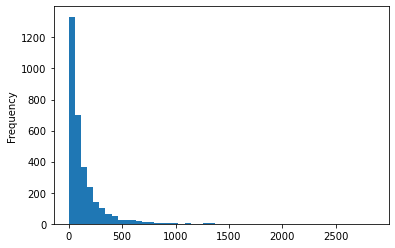

In [6]:
df['length_of_review'].plot(bins=50, kind='hist')

In [7]:
df.length_of_review.describe()

count   3149.00
mean     132.09
std      182.11
min        1.00
25%       30.00
50%       74.00
75%      165.00
max     2851.00
Name: length_of_review, dtype: float64

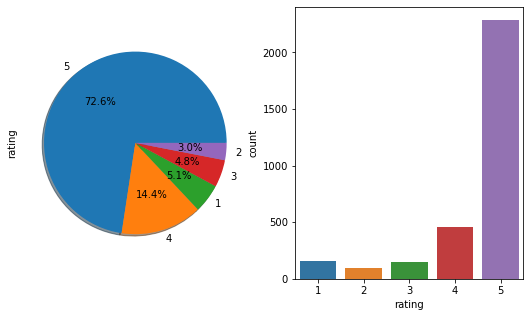

In [8]:
rating_col = ['rating']

plt.figure(figsize=(9, 11))
count = 1
for cols in rating_col:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count +=1
    plt.subplot(2, 2, count)
    sns.countplot(cols, data=df)
    count+=1

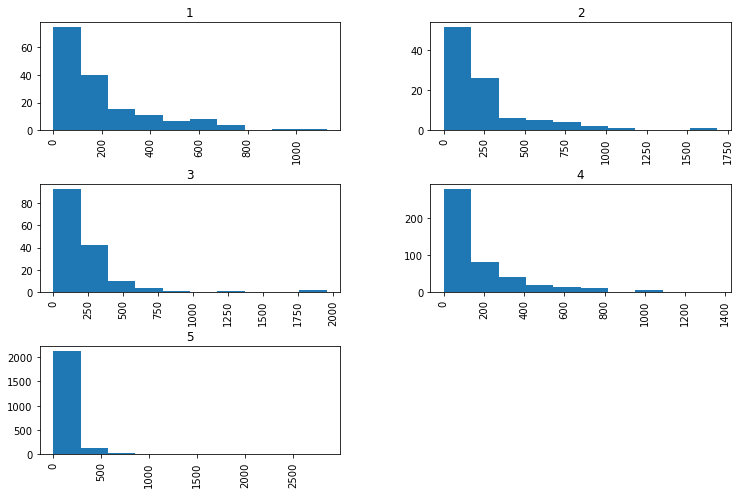

In [9]:
df.hist(column='length_of_review',by='rating',bins=10,figsize=(12,8))
plt.show()

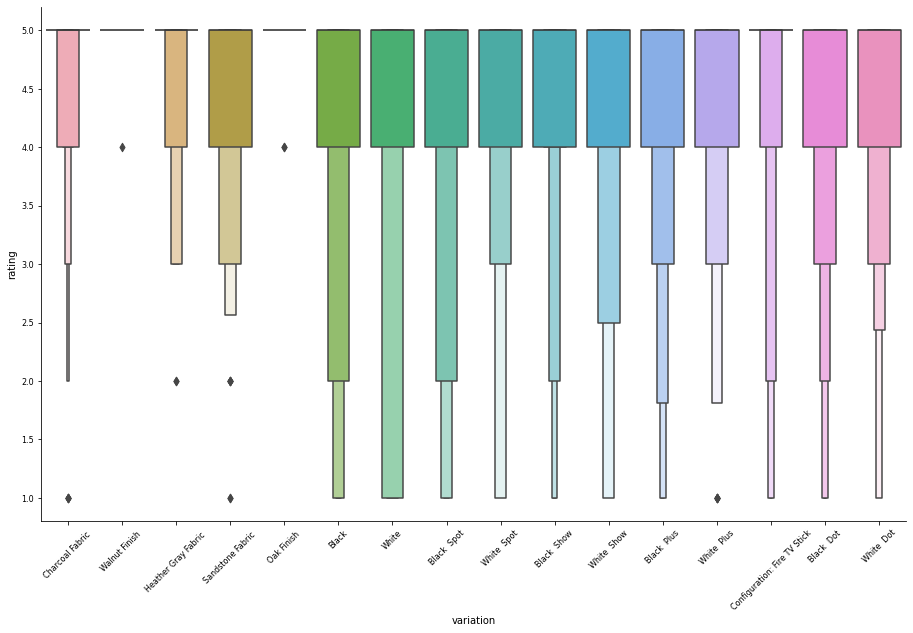

<Figure size 432x288 with 0 Axes>

In [10]:
sns.catplot(x='variation',y='rating',kind='boxen',data=df)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation=45)
plt.figure(figsize=(6,4))
plt.show()

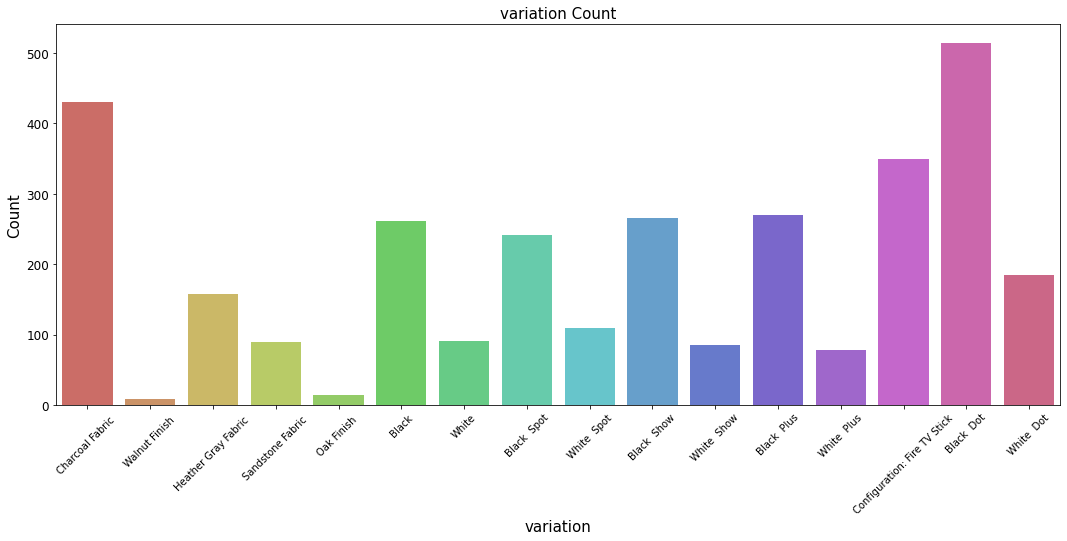

In [11]:
plt.figure(figsize=(18,7))
sns.countplot(x='variation', data=df, palette="hls")
plt.xlabel("variation", fontsize=15) 
plt.ylabel("Count", fontsize=15) 
plt.title("variation Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

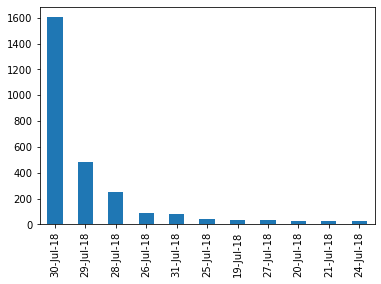

In [12]:
df_date_top10 = pd.DataFrame(df['date'].value_counts()[0:11])
df_date_top10.date.plot.bar()

In [13]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['weekday'] = pd.DatetimeIndex(df['date']).weekday
df.head()

rating       date         variation                                            reviews  length_of_review  month  weekday
0       5  31-Jul-18  Charcoal Fabric                                       Love my Echo!                13      7        1
1       5  31-Jul-18  Charcoal Fabric                                           Loved it!                 9      7        1
2       4  31-Jul-18    Walnut Finish   Sometimes while playing a game, you can answer...               195      7        1
3       5  31-Jul-18  Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...               172      7        1
4       5  31-Jul-18  Charcoal Fabric                                               Music                 5      7        1

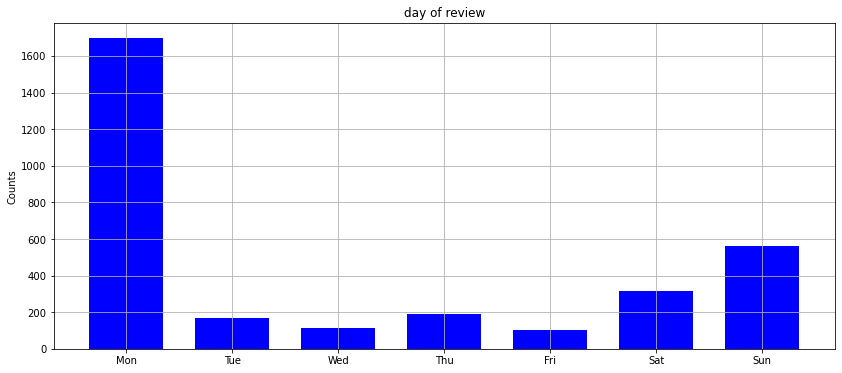

In [14]:
plt.rcParams['figure.figsize'] = (14,6)
df['weekday'].hist(bins=7,color='blue',range = (-.5,6.5),rwidth=.7)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split());
plt.ylabel('Counts')
plt.title('day of review')
plt.show()

In [15]:
!pip install textblob
!pip install wordcloud
!pip install nltk

In [16]:
df['reviews'] = df['reviews'].str.lower()
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')
df['reviews'] = df['reviews'].str.replace('\d', '')

In [17]:
nltk.download('stopwords')
sw = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     R:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
drops = pd.Series(' '.join(df['reviews']).split()).value_counts()[-1000:]
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [19]:
import nltk
nltk.download('punkt')
df["reviews"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to
[nltk_data]     R:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                         [love, echo]
1                                              [loved]
2    [sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, yr, old, learns, dinosaurs, ...
4                                              [music]
Name: reviews, dtype: object

In [20]:
nltk.download('wordnet')
df['reviews'] = df['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviews'].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     R:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing yr old learns dinosaur control l...
4                                                music
5    received echo gift needed another bluetooth so...
6    without cellphone cannot use many feature ipad...
7    think th one ive purchased im working getting ...
8                                           look great
9    love ive listened song havent heard since chil...
Name: reviews, dtype: object

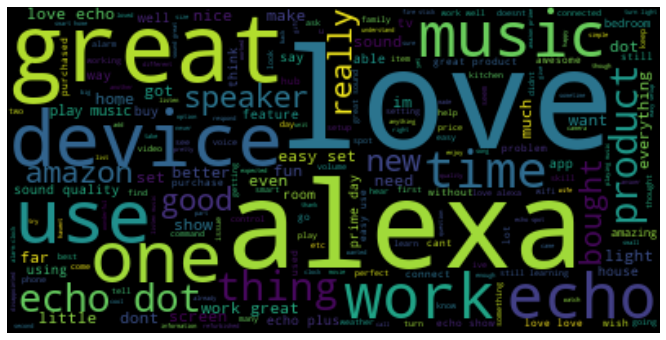

In [21]:
text = " ".join(i for i in df.reviews)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentimental Analysis 

In [22]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     R:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
df["reviews"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...
1    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
2    {'neg': 0.145, 'neu': 0.654, 'pos': 0.201, 'co...
3    {'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'comp...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5    {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'comp...
6    {'neg': 0.119, 'neu': 0.697, 'pos': 0.184, 'co...
7    {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...
8    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
9    {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...
Name: reviews, dtype: object

In [24]:
df["reviews"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.64
1   0.60
2   0.05
3   0.92
4   0.00
5   0.86
6   0.56
7   0.56
8   0.62
9   0.85
Name: reviews, dtype: float64

In [25]:
df["polarity_score"] = df["reviews"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

rating       date         variation                                            reviews  length_of_review  month  weekday  polarity_score
0       5  31-Jul-18  Charcoal Fabric                                           love echo                13      7        1            0.64
1       5  31-Jul-18  Charcoal Fabric                                               loved                 9      7        1            0.60
2       4  31-Jul-18    Walnut Finish   sometimes playing game answer question correct...               195      7        1            0.05
3       5  31-Jul-18  Charcoal Fabric   lot fun thing yr old learns dinosaur control l...               172      7        1            0.92
4       5  31-Jul-18  Charcoal Fabric                                               music                 5      7        1            0.00

In [26]:
df["reviews"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    pos
4    neg
5    pos
6    pos
7    pos
8    pos
9    pos
Name: reviews, dtype: object

In [27]:
df["sentiment"] = df["reviews"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head(20)

rating       date             variation                                            reviews  length_of_review  month  weekday  polarity_score sentiment
0        5  31-Jul-18      Charcoal Fabric                                           love echo                13      7        1            0.64       pos
1        5  31-Jul-18      Charcoal Fabric                                               loved                 9      7        1            0.60       pos
2        4  31-Jul-18        Walnut Finish   sometimes playing game answer question correct...               195      7        1            0.05       pos
3        5  31-Jul-18      Charcoal Fabric   lot fun thing yr old learns dinosaur control l...               172      7        1            0.92       pos
4        5  31-Jul-18      Charcoal Fabric                                               music                 5      7        1            0.00       neg
5        5  31-Jul-18  Heather Gray Fabric   received echo gift needed another bluetooth so...               172      7        1            0.86       pos
6        3  31-Jul-18     Sandstone Fabric   without cellphone cannot use many feature ipad...               365      7        1            0.56       pos
7        5  31-Jul-18      Charcoal Fabric   think th one ive purchased im working getting ...               221      7        1            0.56       pos
8        5  30-Jul-18  Heather Gray Fabric                                          look great                11      7        0            0.62       pos
9        5  30-Jul-18  Heather Gray Fabric   love ive listened song havent heard since chil...               114      7        0            0.85       pos
10       5  30-Jul-18      Charcoal Fabric                   sent year old dad talk constantly                63      7        0            0.00       neg
11       5  30-Jul-18      Charcoal Fabric   love learning knew thing eveyday still figurin...               169      7        0            0.89       pos
12       5  30-Jul-18           Oak Finish   purchased mother knee problem give something t...               290      7        0            0.67       pos
13       5  30-Jul-18      Charcoal Fabric                                      love love love                18      7        0            0.93       pos
14       5  30-Jul-18           Oak Finish                                            expected                24      7        0            0.00       neg
15       5  30-Jul-18  Heather Gray Fabric                                      love wife hate                25      7        0            0.13       pos
16       5  30-Jul-18  Heather Gray Fabric        really happy purchase great speaker easy set                67      7        0            0.91       pos
17       5  30-Jul-18  Heather Gray Fabric   using alexa couple day lot fun new toy like ne...               216      7        0            0.83       pos
18       5  30-Jul-18      Charcoal Fabric   love size nd generation echo still need little...                86      7        0            0.79       pos
19       4  30-Jul-18     Sandstone Fabric   liked original echo shorter greater fabriccolo...               451      7        0            0.94       pos

In [28]:
df["sentiment"].value_counts()

pos    2627
neg     522
Name: sentiment, dtype: int64

In [29]:
df.groupby("sentiment")["rating"].mean()

sentiment
neg   3.65
pos   4.62
Name: rating, dtype: float64

In [30]:
df["sentiment"] = LabelEncoder().fit_transform(df["sentiment"])
X = df["reviews"]
y = df["sentiment"]

In [31]:
import plotly.graph_objs as go
import plotly
poslens = df[df['sentiment']==1]['reviews'].str.len()
neglens = df[df['sentiment']==0]['reviews'].str.len()
fig = go.Figure()
fig.add_trace(
    go.Histogram(x=poslens, xbins=dict(size=200), name='1'),
    )
fig.add_trace(
    go.Histogram(x=neglens, xbins=dict(size=200), name='0'),
    )
fig.update_layout(title='Length of reviews', 
                    xaxis_title="length_of_review",
                    yaxis_title="# of reviews",)
plotly.offline.iplot(fig)

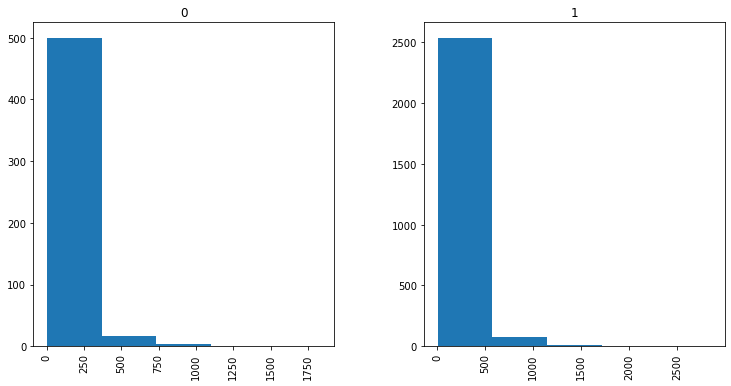

In [55]:
df.hist(column='length_of_review',by='sentiment',bins=5,figsize=(12,6))

plt.show()

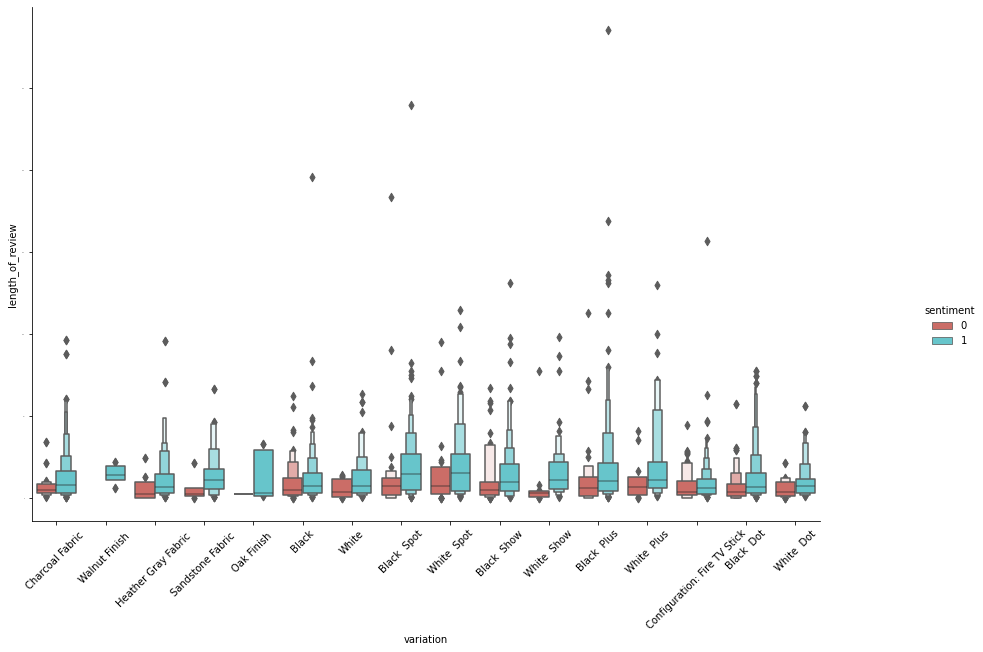

In [33]:
sns.catplot(data=df, x='variation', y='length_of_review', hue='sentiment', kind='boxen', palette="hls");
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=1)
plt.xticks(rotation=45)
plt.show()

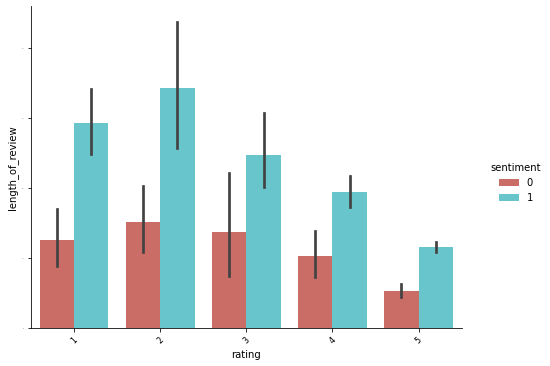

In [34]:
sns.catplot(data=df, x='rating', y='length_of_review', hue='sentiment', kind='bar', palette="hls");
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=1)
plt.xticks(rotation=45)
plt.show()

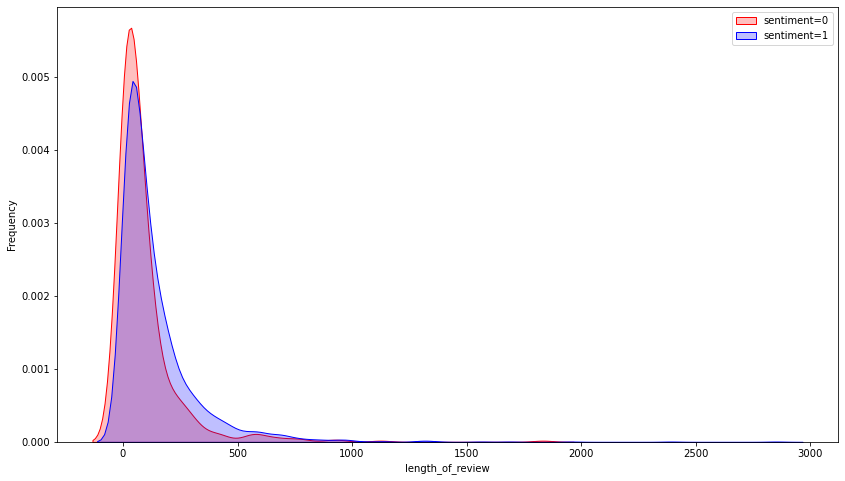

In [35]:
plt.figure(figsize=(14, 8))
g = sns.kdeplot(df["length_of_review"][(df["sentiment"] == 0) & (df["length_of_review"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["length_of_review"][(df["sentiment"] == 1) & (df["length_of_review"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("length_of_review")
g.set_ylabel("Frequency")
g = g.legend(["sentiment=0","sentiment=1"])

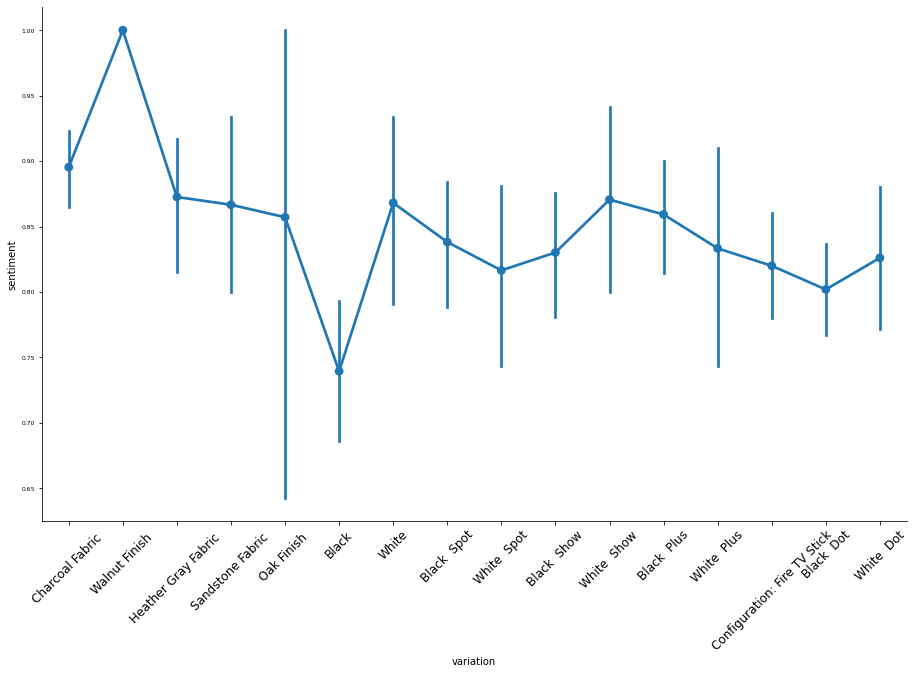

In [36]:
sns.catplot(x='variation',y='sentiment',kind='point',data=df)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=6)
plt.xticks(rotation=45)
plt.show()

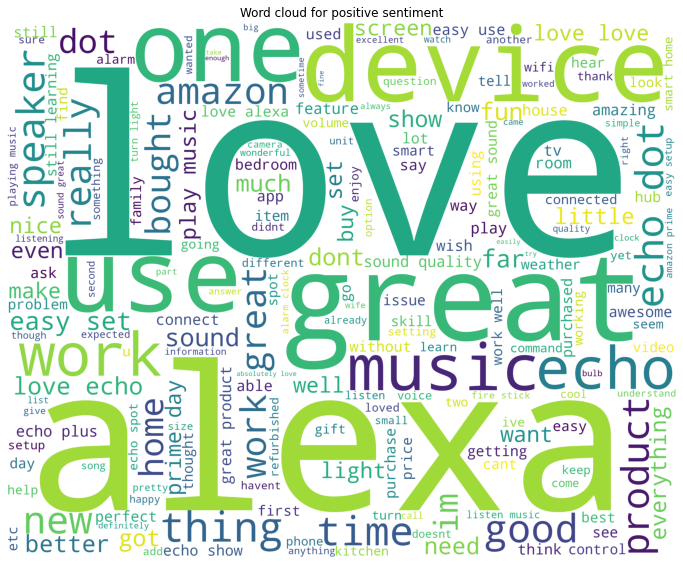

In [53]:
df_pos = df[df['sentiment']==1]['reviews']
from wordcloud import WordCloud,STOPWORDS
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Word cloud for positive sentiment')
plt.show()

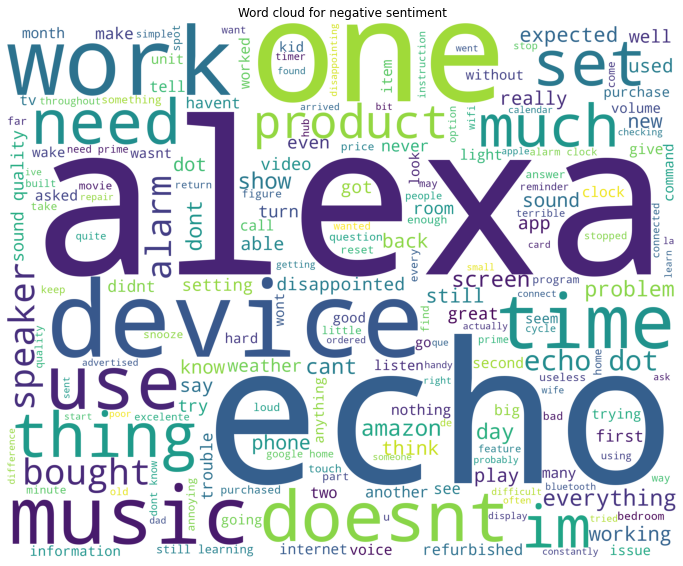

In [52]:
df_pos = df[df['sentiment']==0]['reviews']
from wordcloud import WordCloud,STOPWORDS
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Word cloud for negative sentiment')
plt.show()

## Topic Modelling

In [39]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3149):
    review = re.sub('[^a-zA-Z]', ' ', df['reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=' '.join(review)
    corpus.append(review)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_c.toarray()

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names()
X_n.toarray()

vectorizer3 = CountVectorizer()
X_count = vectorizer3.fit_transform(corpus)
vectorizer3.get_feature_names()
X_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')
X_w = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_w.toarray()

vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_n = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_n.toarray()

tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(corpus)
X_tf_idf_word.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.20584972, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
log_model = LogisticRegression().fit(X_tf_idf_word, y)
y_pred = cross_val_predict(log_model,
                X_tf_idf_word,
                y,
                cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[  88  434]
 [   9 2618]]


In [44]:
log_model = LogisticRegression().fit(X_count, y)
import sklearn
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

results=sklearn.model_selection.cross_validate(log_model,
                X_count,
                y, scoring=scoring,
                cv=5)
print('accuracy:',np.mean(results['test_accuracy']))
print('f1 score: ',np.mean(results['test_f1_score']))
print('precision: ',np.mean(results['test_precision']))
print('recall: ',np.mean(results['test_recall']))

accuracy: 0.9361692785222197
f1 score:  0.9619412775384056
precision:  0.9567543900109353
recall:  0.967257649827992


In [45]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

results=sklearn.model_selection.cross_validate(log_model,
                X_tf_idf_word,
                y, scoring=scoring,
                cv=5)
print('accuracy:',np.mean(results['test_accuracy']))
print('f1 score: ',np.mean(results['test_f1_score']))
print('precision: ',np.mean(results['test_precision']))
print('recall: ',np.mean(results['test_recall']))

accuracy: 0.8593196557902442
f1 score:  0.9220135112368023
precision:  0.8578741806477435
recall:  0.9965743255477095


In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
rf_model = RandomForestClassifier().fit(X_count, y)
y_pred = cross_val_predict(rf_model,
                X_count,
                y,
                cv=5)
conf_mat = confusion_matrix(y, y_pred)

print(conf_mat)

[[ 380  142]
 [  61 2566]]


In [47]:
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.9355353673000731

In [48]:
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.921241577712166

<AxesSubplot:>

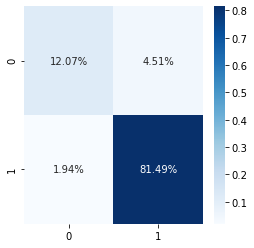

In [49]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

In [50]:
rf_model = RandomForestClassifier().fit(X_count, y)
results=sklearn.model_selection.cross_validate(rf_model, X_count, y,scoring=scoring, cv=5, n_jobs=-1)
print('accuracy:',np.mean(results['test_accuracy']))
print('f1 score: ',np.mean(results['test_f1_score']))
print('precision: ',np.mean(results['test_precision']))
print('recall: ',np.mean(results['test_recall']))

accuracy: 0.9320412849824615
f1 score:  0.9599026376532811
precision:  0.9455429559596595
recall:  0.9748687307622669


In [51]:
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
results=sklearn.model_selection.cross_validate(rf_model, X_tf_idf_word, y,scoring=scoring, cv=5, n_jobs=-1)
print('accuracy:',np.mean(results['test_accuracy']))
print('f1 score: ',np.mean(results['test_f1_score']))
print('precision: ',np.mean(results['test_precision']))
print('recall: ',np.mean(results['test_recall']))

accuracy: 0.9234678375854847
f1 score:  0.9548664346137791
precision:  0.9402278535483365
recall:  0.9702980264349085
